# DATA UNDERSTANDING PER AREA

In [13]:
stop = "5"

### IMPORT LIBRARIES

In [14]:
# folium allows to visualize geolocalized data with the jupyter notebook
import folium
from folium.plugins import MarkerCluster
# pandas is needed to read the csv file and to perform some basic operations on dataframes
import pandas as pd
# matplotlib is used to draw graphs
import matplotlib.pyplot as plt
# module for different stats
from statistics import mean 

import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
import selenium.webdriver

In [15]:
df2 = pd.read_csv('../../../datasets/in/Traj'+stop+'min/area2_month9_10_week0_stops.csv') 

In [16]:
df2.head()

,vehicle,tid,company,vehicletype,length,duration,start_time,end_time,start_point,end_point
0,2580_89690,22967,7740,Van,31.744040,2187.00,2017-09-01 09:13:40,2017-09-01 09:50:07,"[38.087194, 23.621821, 1504250.02]","[37.990029, 23.780434, 1504252.207]"
1,2580_89690,22973,7740,Van,2.286135,1063.99,2017-09-01 10:17:17,2017-09-01 10:35:01,"[37.990029, 23.780434, 1504253.837]","[37.99487, 23.77367, 1504254.901]"
2,2580_89690,22974,7740,Van,1.359955,744.99,2017-09-01 10:36:01,2017-09-01 10:48:26,"[37.99487, 23.77367, 1504254.961]","[38.003875, 23.775085, 1504255.706]"
3,2580_89690,22976,7740,Van,4.464879,1328.05,2017-09-01 11:00:24,2017-09-01 11:22:32,"[38.005082, 23.775976, 1504256.424]","[38.028877, 23.789664, 1504257.752]"
4,2580_89690,22978,7740,Van,0.211283,355.96,2017-09-01 11:28:35,2017-09-01 11:34:31,"[38.028877, 23.789664, 1504258.115]","[38.028915, 23.789555, 1504258.471]"


In [17]:
len(df2["vehicle"].unique())

718

In [7]:
n_traj = []
lengths_v = []
durations_v = []
lengths = []
durations = []

n_v = len(df2["vehicle"].unique())

for v in df2["vehicle"].unique():
    df_v = df2[df2["vehicle"] == v]
    n_traj.append(len(df_v))
    lengths_v.append(np.mean(df_v["length"]))
    durations_v.append(np.mean(df_v["duration"]))
    lengths.extend(df_v["length"])
    durations.extend(df_v["duration"])

print("mean n traj", np.mean(n_traj))
print("std n traj", np.std(n_traj))
print("mean length per vehicle", np.mean(lengths_v))
print("std length per vehicle", np.std(lengths_v))
print("mean duration per vehicle", np.mean(durations_v)/60)
print("std duration per vehicle", np.std(durations_v)/60)
print("mean length all traj", np.mean(lengths))
print("std length all traj", np.std(lengths))
print("mean duration all traj", np.mean(durations)/60)
print("std duration all traj", np.std(durations)/60)

mean n traj 419.86211699164346
std n traj 255.74962553329547
mean length per vehicle 11.332114613483194
std length per vehicle 6.111636185697218
mean duration per vehicle 24.652394596883465
std duration per vehicle 10.42578928157353
mean length all traj 10.400475745894271
std length all traj 14.169609738534037
mean duration all traj 23.846992894934996
std duration all traj 23.819497228948375


In [19]:
vehicletypes = []
v_list = df2["vehicle"].unique()
for v in v_list:
    df_i = df2[df2["vehicle"] == v]
    vehicletypes.append(df_i["vehicletype"].unique()[0])
    
s = pd.Series(vehicletypes)

In [27]:
print(df2["vehicletype"].unique())
print(s.value_counts())
sumv = np.sum(s.value_counts())
print(sumv)
print(np.divide(s.value_counts(), sumv))

['Van' 'Truck 3' 'Truck 3 ax.' 'Flatbed truck' 'Truck']
Van              509
Truck 3          193
Truck 3 ax.       13
Flatbed truck      2
Truck              1
dtype: int64
718
Van              0.708914
Truck 3          0.268802
Truck 3 ax.      0.018106
Flatbed truck    0.002786
Truck            0.001393
dtype: float64


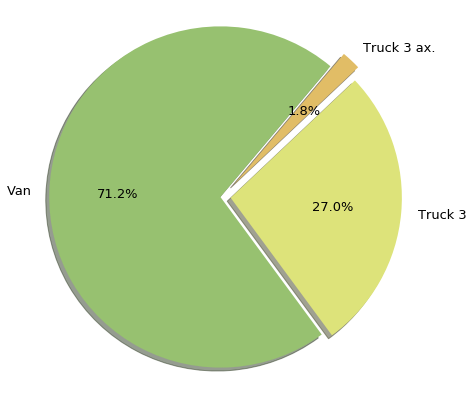

In [28]:
fig = plt.figure(figsize=(7, 7)) 
fig_dims = (1, 1)

ax = plt.subplot2grid(fig_dims, (0, 0))
labels = df2["vehicletype"].unique()[0:3]
sizes = s.value_counts()[0:3]
explode = (0.01, 0.05, 0.1)
c = ["#97c170", "#dde37a", "#e1bd66"]
inside, texts, ltexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50, colors=c)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 
plt.savefig('../../../thesis/images/Area2_vehicletype.png', format='png', bbox_inches='tight')

## AREA 11

In [8]:
df11 = pd.read_csv('../../../datasets/in/Traj'+stop+'min/area11_month9_10_week0_stops.csv') 

In [9]:
n_traj = []
lengths_v = []
durations_v = []
lengths = []
durations = []

n_v = len(df11["vehicle"].unique())

for v in df11["vehicle"].unique():
    df_v = df11[df11["vehicle"] == v]
    n_traj.append(len(df_v))
    lengths_v.append(np.mean(df_v["length"]))
    durations_v.append(np.mean(df_v["duration"]))
    lengths.extend(df_v["length"])
    durations.extend(df_v["duration"])

print("mean n traj", np.mean(n_traj))
print("std n traj", np.std(n_traj))
print("mean length per vehicle", np.mean(lengths_v))
print("std length per vehicle", np.std(lengths_v))
print("mean duration per vehicle", np.mean(durations_v)/60)
print("std duration per vehicle", np.std(durations_v)/60)
print("mean length all traj", np.mean(lengths))
print("std length all traj", np.std(lengths))
print("mean duration all traj", np.mean(durations)/60)
print("std duration all traj", np.std(durations)/60)

mean n traj 498.71785714285716
std n traj 278.7193462371006
mean length per vehicle 7.5310022839187845
std length per vehicle 4.855917025273614
mean duration per vehicle 20.295399152854777
std duration per vehicle 9.055900651840094
mean length all traj 6.638653102546265
std length all traj 9.653959128689168
mean duration all traj 19.246502235255644
std duration all traj 19.84913016367212


In [29]:
vehicletypes = []
v_list = df11["vehicle"].unique()
for v in v_list:
    df_i = df11[df11["vehicle"] == v]
    vehicletypes.append(df_i["vehicletype"].unique()[0])
    
s = pd.Series(vehicletypes)

In [30]:
print(df11["vehicletype"].unique())
print(s.value_counts())
sumv = np.sum(s.value_counts())
print(sumv)
print(np.divide(s.value_counts(), sumv))

['Truck 3' 'Van' 'Truck 3 ax.']
Van            208
Truck 3         69
Truck 3 ax.      3
dtype: int64
280
Van            0.742857
Truck 3        0.246429
Truck 3 ax.    0.010714
dtype: float64


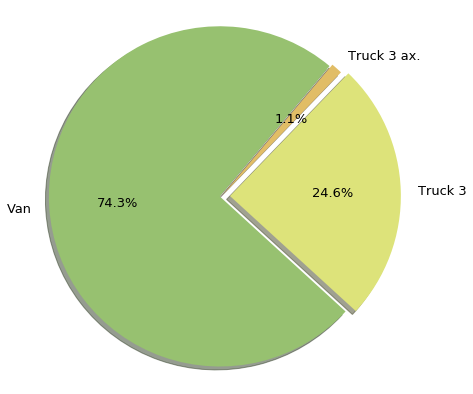

In [32]:
fig = plt.figure(figsize=(7, 7)) 
fig_dims = (1, 1)

ax = plt.subplot2grid(fig_dims, (0, 0))
labels = df2["vehicletype"].unique()[0:3]
sizes = s.value_counts()[0:3]
explode = (0.01, 0.05, 0.01)
c = ["#97c170", "#dde37a", "#e1bd66"]
inside, texts, ltexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50, colors=c)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 

plt.savefig('../../../thesis/images/Area11_vehicletype.png', format='png', bbox_inches='tight')

In [14]:
driver = selenium.webdriver.PhantomJS()

C:\Users\Francesca\Anaconda3\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [28]:
start_points_string = list(df2["start_point"])
end_points_string = list(df2["end_point"])

points = []
# in csv points are stored as strings
for i in range(len(start_points_string)):
    p_start = start_points_string[i]
    p_0 = (p_start.split(','))[0][1:]
    p_1 = (p_start.split(','))[1][1:]
    points.append([float(p_0), float(p_1)])

In [29]:
m = folium.Map(location=[38, 23], zoom_start=10) ## area 2

# Plot it on the map
HeatMap(points).add_to(m)

m.save('../../../thesis/images/heatmap_area_2.html')

In [30]:
driver.set_window_size(2500, 1800)
driver.get('../../../thesis/images/heatmap_area_2.html')
driver.save_screenshot('../../../thesis/images/heatmap_area_2.png')

True

In [34]:
start_points_string = list(df11["start_point"])
end_points_string = list(df11["end_point"])

points = []
# in csv points are stored as strings
for i in range(len(start_points_string)):
    p_start = start_points_string[i]
    p_0 = (p_start.split(','))[0][1:]
    p_1 = (p_start.split(','))[1][1:]
    points.append([float(p_0), float(p_1)])

In [35]:
m = folium.Map(location=[38, 23.68], zoom_start=12) ## area 11

# Plot it on the map
HeatMap(points).add_to(m)

# Display the map
m.save('../../../thesis/images/heatmap_area_11.html')

In [36]:
driver.set_window_size(2500, 1800)
driver.get('../../../thesis/images/heatmap_area_11.html')
driver.save_screenshot('../../../thesis/images/heatmap_area_11.png')

True